# Nimesh Sinha

# Airlines Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
data = pd.read_csv('airlines.csv')

In [3]:
data.head()

,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,# of Delays.Weather,Cancelled,Carriers.Total,Code,Delayed,Diverted,...,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather,Month,Month Name,Name,On Time,Year
0,1009,1275,3217,17,328,216,11,ATL,5843,27,...,68335,118831,518,268764,19474,6,June,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",23974,2003
1,374,495,685,3,66,138,14,BOS,1623,3,...,28189,24400,99,77167,4160,6,June,"Boston, MA: Logan International",7875,2003
2,296,477,389,8,78,29,11,BWI,1245,15,...,26810,17556,278,64480,6201,6,June,"Baltimore, MD: Baltimore/Washington Internatio...",6998,2003
3,300,472,735,2,54,73,11,CLT,1562,14,...,23379,23804,127,65865,3792,6,June,"Charlotte, NC: Charlotte Douglas International",7021,2003
4,283,268,487,4,58,74,13,DCA,1100,18,...,13712,20999,120,52747,4141,6,June,"Washington, DC: Ronald Reagan Washington National",5321,2003


In [4]:
data.columns

Index(['# of Delays.Carrier', '# of Delays.Late Aircraft',
       '# of Delays.National Aviation System', '# of Delays.Security',
       '# of Delays.Weather', 'Cancelled', 'Carriers.Total', 'Code', 'Delayed',
       'Diverted', 'Flights.Total', 'Label', 'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather', 'Month',
       'Month Name', 'Name', 'On Time', 'Year'],
      dtype='object')

As there are many airports, I have selected the five popular airports which are John F Kennedy, San Francisco, Los Angeles, Boston and Atlanta.

In [5]:
l = ['JFK','SFO','LAX','BOS','ATL']
data = data[(data['Code'] =='JFK') | (data['Code'] =='SFO')|(data['Code'] =='LAX')|
            (data['Code'] =='ATL')| (data['Code'] =='BOS')]

# 1. Bar plot

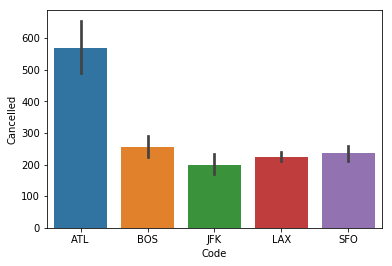

In [6]:
ax = sns.barplot(x="Code", y="Cancelled", data=data, )
fig = ax.get_figure()
fig.savefig('barplot.png')

Above is the barplot of cancelled flights for 5 famous airports John F Kennedy, San Francisco, Los Angeles, Boston and Atlanta from June, 2003 to January, 2016. Atlanta has the highest number of cancelled flights followed by Boston and SFO.

# 2. Box plot

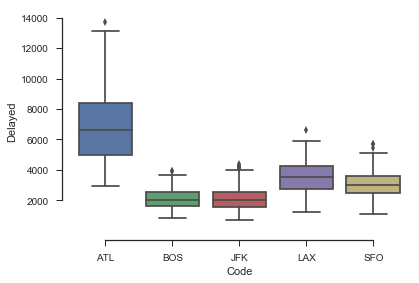

In [7]:
sns.set(style="ticks")
ax = sns.boxplot(x="Code", y="Delayed", data=data)
sns.despine(offset=10, trim=True)
fig = ax.get_figure()
fig.savefig('boxplot.png')

The above boxplot shows the delayed number of flights for five popular airports. Atlanta has most number of delayed flights followed by Los Angeles and SFO.

# 3. Bivariate scatter plot

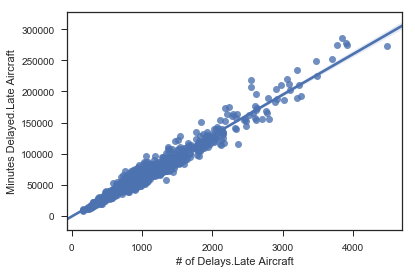

In [8]:
ax = sns.regplot(x=data["# of Delays.Late Aircraft"], y=data["Minutes Delayed.Late Aircraft"])
fig = ax.get_figure()
fig.savefig('bivariate_scatter.png')


The above bivariate scatter plot shows the number of delays due to late aircraft and minutes delayed due to late aircraft. There is very good relation between the two variables which makes sense.

# 4. Multivariate scatter plot

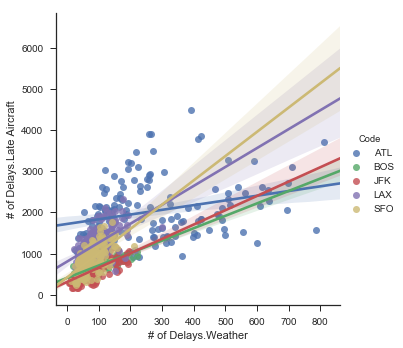

In [9]:
sns_plot = sns.lmplot(x="# of Delays.Weather", y="# of Delays.Late Aircraft", hue = "Code", data = data)
sns_plot.savefig("multivariate_scatter.png")

The above plot shows the number of delays due to late aircraft and number of delays due to bad weather for the five airports. There is good correlation between the two variables for all the airports except Atlanta which has higher number of delays due to weather than due to late aircrafts

# 5. Swarm plot

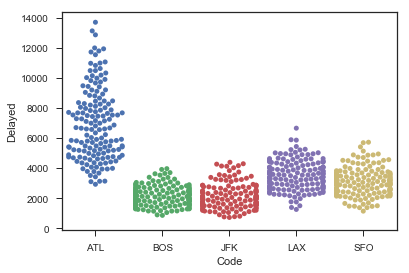

In [10]:
ax = sns.swarmplot(x="Code", y="Delayed", data=data)
fig = ax.get_figure()
fig.savefig('swarm.png')


The above swarm plot shows that only Atlanta has large variance in number of delayed flights. All other airports have almost same number of delayed flights every month and there is no large variance

# 6. Faceted histogram

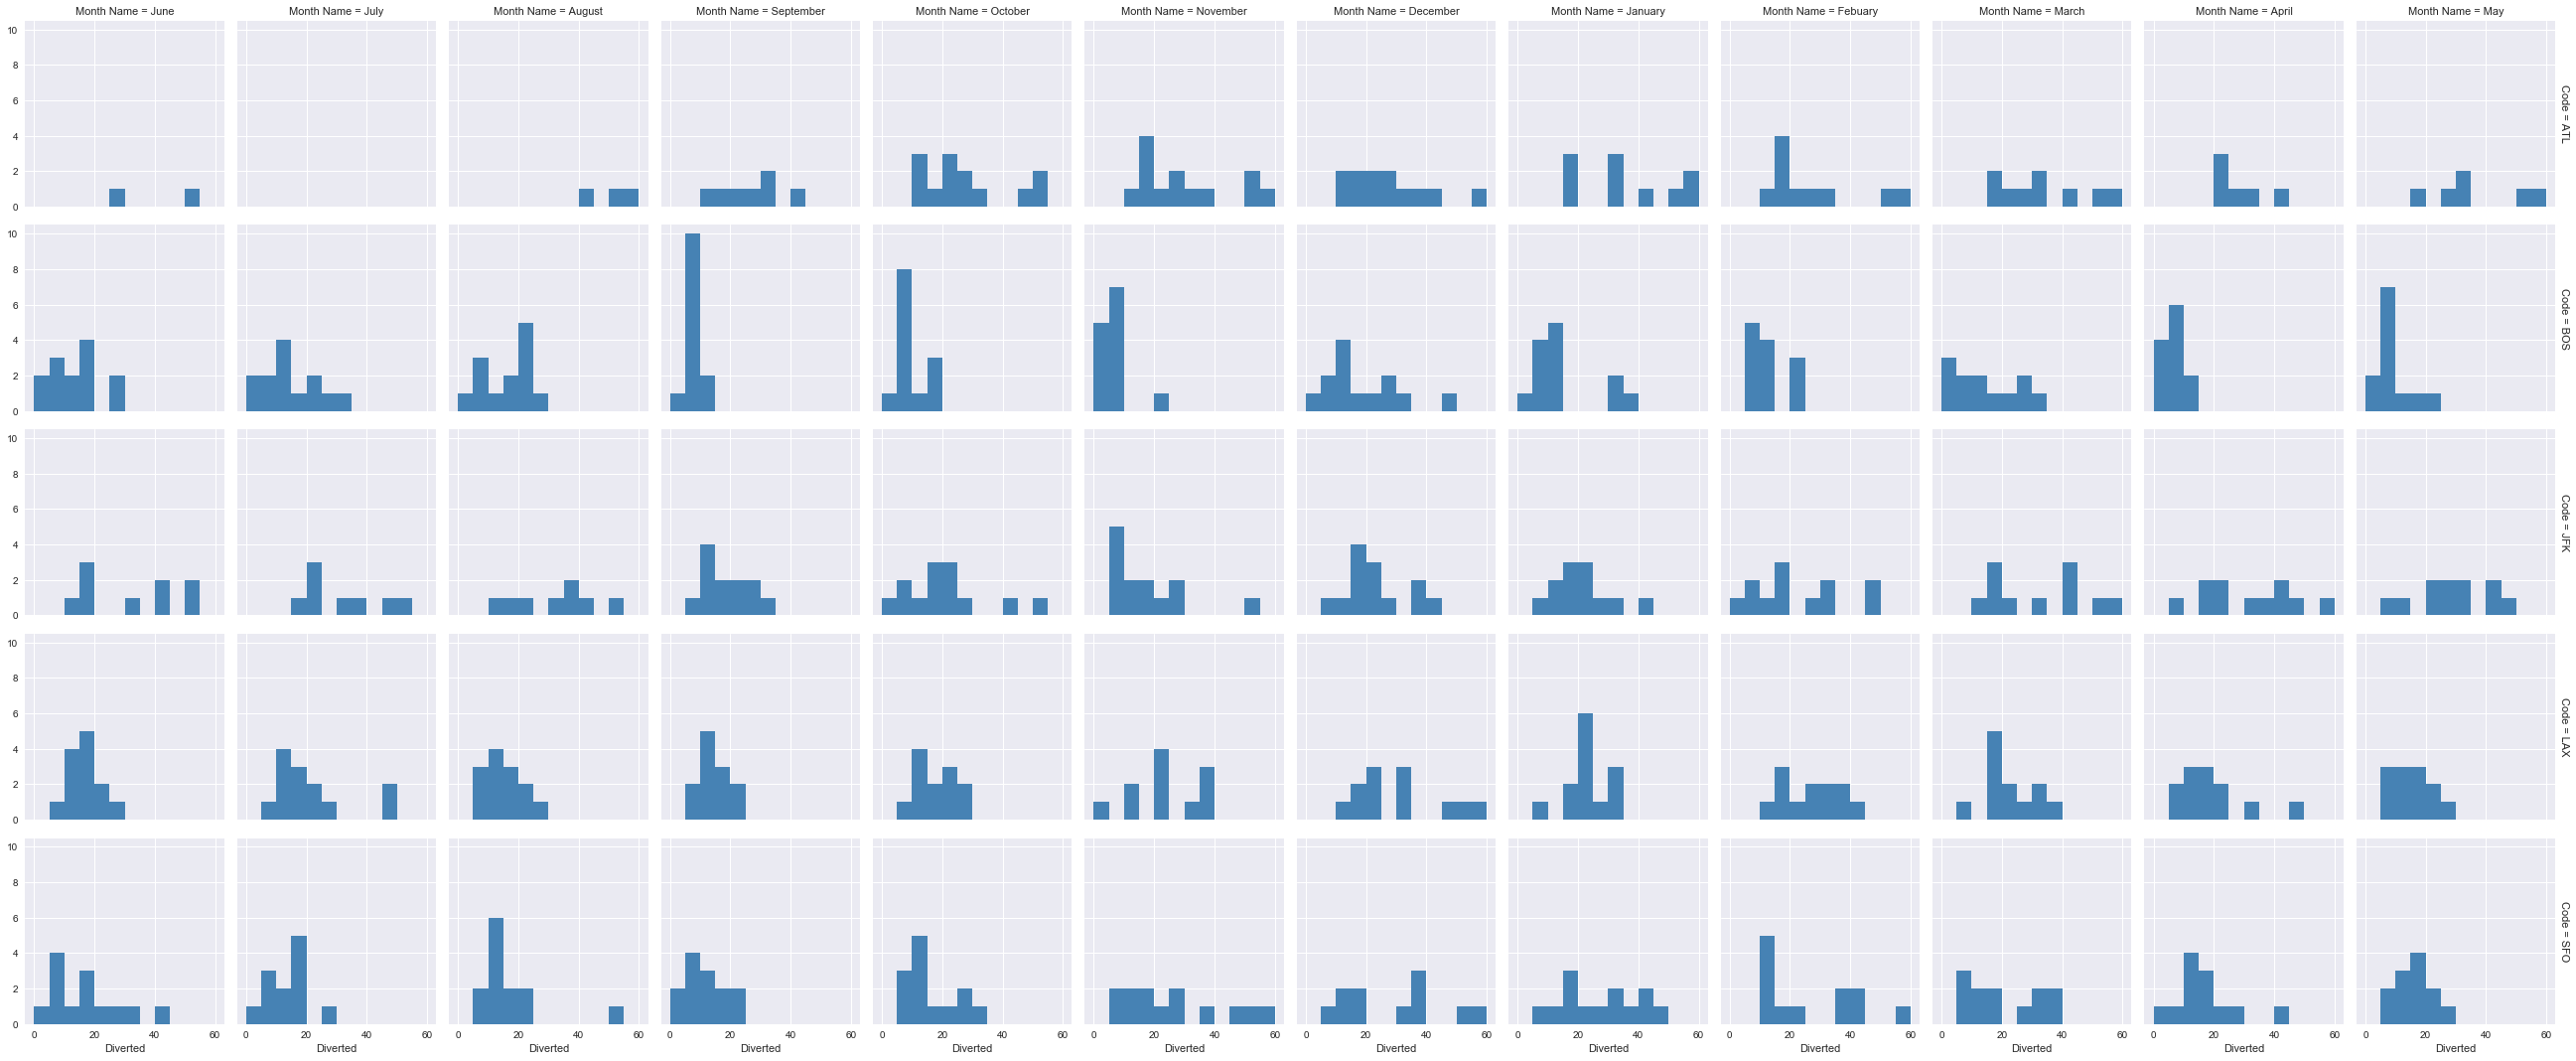

In [11]:
sns.set(style="darkgrid")

import numpy as np
g = sns.FacetGrid(data, row="Code", col="Month Name", margin_titles=True)
bins = np.linspace(0, 60, 13)
sns_plot = g.map(plt.hist, "Diverted", color="steelblue", bins=bins, lw=0)
sns_plot.savefig("facet_hitogram.png")

The faceted histogram shows the number of diverted flights in each month for five airports. Some airports in a particular month of a year.For example, Boston has high number of diverted flights in September and November than usual.

# Violin plot

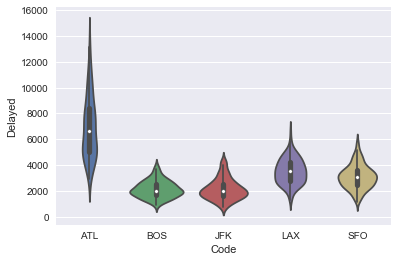

In [12]:
ax = sns.violinplot(x="Code", y="Delayed", data=data)
fig = ax.get_figure()
fig.savefig('violin_plot.png')


The above violin plot shows the distribution of number of delayed flights. Boston and JFK airports are very consistent with number of delayed flights in every month.

# Heat map

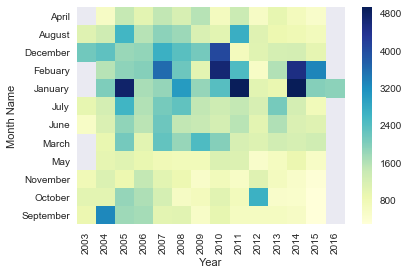

In [13]:
flights = data.groupby(['Year','Month Name']).agg({'Cancelled': 'sum'})
flights = flights.reset_index()
flights = flights.pivot("Month Name", "Year", "Cancelled")
ax = sns.heatmap(flights, cmap="YlGnBu")
fig = ax.get_figure()
fig.savefig('heatmap_plot.png')

The above heat map shows the variance of total number of cancelled flights each month of each year. December and January and February are the months where number of cancelled flights is higher which makes sense and the reason can be snowfall during these months.

# Bubble plot

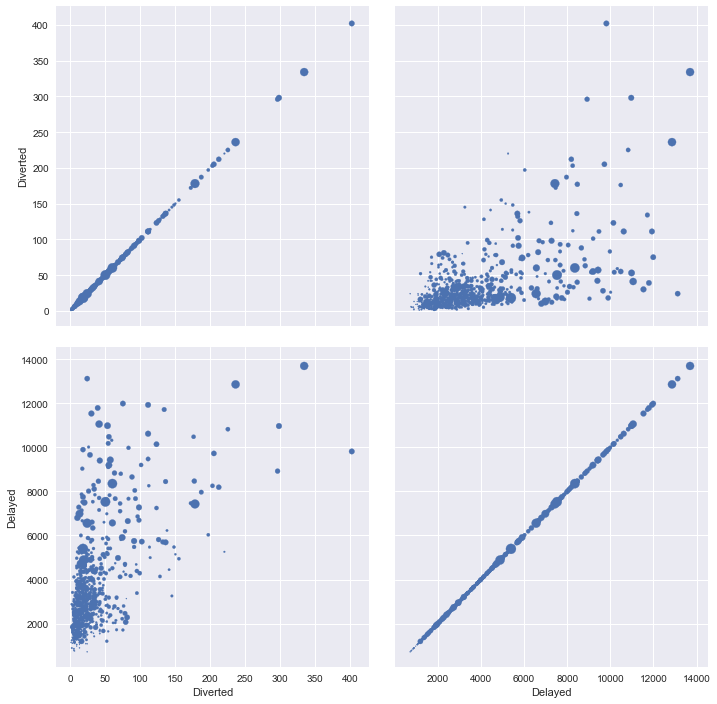

In [14]:
bubbleSize = 100 * (data['Cancelled'] / data['Cancelled'].max())
g = sns.PairGrid(data, vars=["Diverted", "Delayed"], size=5)
g.map(plt.scatter, s=bubbleSize)
g.savefig('bubbleplot.png')
plt.show()

The above pairwise bubble plot shows the variation of delayed, diverted and cancelled number of flights for different airports in a month. As the number of delayed and diverted flights increases, the number of cancelled flight also increases which is given by the size of bubble.